In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import seaborn as sns

# The statistical module used to run chi square test
import scipy.stats as stats


In [2]:
df11 = pd.read_csv("annual_aqi_by_county_2011.csv")
df12 = pd.read_csv("annual_aqi_by_county_2012.csv")
df13 = pd.read_csv("annual_aqi_by_county_2013.csv")
df14 = pd.read_csv("annual_aqi_by_county_2014.csv")
df15 = pd.read_csv("annual_aqi_by_county_2015.csv")

In [3]:
frames = [df11, df12, df13, df14, df15]
df_air = pd.concat(frames).reset_index()
df_air.head()

,index,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,Alabama,Baldwin,2011,282,204,69,9,0,0,0,126,74,42,0,0,209,0,73,0
1,1,Alabama,Clay,2011,118,80,38,0,0,0,0,86,63,39,0,0,0,0,118,0
2,2,Alabama,Colbert,2011,279,214,64,1,0,0,0,101,61,42,0,0,197,0,82,0
3,3,Alabama,DeKalb,2011,336,257,78,1,0,0,0,101,63,40,0,0,271,0,65,0
4,4,Alabama,Elmore,2011,242,192,48,2,0,0,0,105,64,44,0,0,242,0,0,0


In [4]:
df_air.County = df_air.County + " County, " + df_air.State
df_air.head()

,index,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,Alabama,"Baldwin County, Alabama",2011,282,204,69,9,0,0,0,126,74,42,0,0,209,0,73,0
1,1,Alabama,"Clay County, Alabama",2011,118,80,38,0,0,0,0,86,63,39,0,0,0,0,118,0
2,2,Alabama,"Colbert County, Alabama",2011,279,214,64,1,0,0,0,101,61,42,0,0,197,0,82,0
3,3,Alabama,"DeKalb County, Alabama",2011,336,257,78,1,0,0,0,101,63,40,0,0,271,0,65,0
4,4,Alabama,"Elmore County, Alabama",2011,242,192,48,2,0,0,0,105,64,44,0,0,242,0,0,0


In [5]:
df_air.to_csv("final_ap_df.csv")

In [6]:
df_air.drop(columns=["index","State", "Year"], inplace=True)
final_df_air = df_air.groupby("County").mean()
final_df_air.head()


,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
County,,,,,,,,,,,,,,,,
"Abbeville County, South Carolina",220.6,205.6,14.8,0.2,0.0,0.0,0.0,92.4,48.6,36.2,0.0,0.0,220.6,0.0,0.0,0.0
"Ada County, Idaho",365.2,285.0,72.0,6.4,1.6,0.2,0.0,166.2,65.0,39.4,4.8,47.0,223.6,0.2,47.0,42.6
"Adair County, Oklahoma",365.0,227.4,130.8,6.4,0.4,0.0,0.0,137.6,71.2,45.6,0.0,1.6,212.6,1.0,147.0,2.8
"Adams County, Colorado",365.0,231.6,124.6,8.4,0.4,0.0,0.0,138.4,75.6,47.0,0.0,108.8,204.8,1.0,21.8,28.6
"Adams County, Illinois",291.8,265.2,25.6,0.8,0.2,0.0,0.0,106.2,50.2,37.2,0.0,0.0,291.8,0.0,0.0,0.0


In [7]:
df_lung = pd.read_csv("lung_bycounty.csv", encoding = 'ISO-8859-1')
df_skin = pd.read_csv("skin_bycounty.csv", encoding = 'ISO-8859-1')
df_blood = pd.read_csv("leukemia_bycounty.csv", encoding = 'ISO-8859-1')

In [8]:
df_blood.head()

,County,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate() - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0.0,***,13.6,13.6,13.7,47270,falling,-1.6,-2.7,-0.5
1,"Turner County, South Dakota(6,10)",46125.0,***,41.9,25.2,65.9,4,stable,-5.5,-43.8,58.8
2,"Mountrail County, North Dakota(6,10)",38061.0,***,35.7,20,58.7,3,*,*,*,*
3,"Bon Homme County, South Dakota(6,10)",46009.0,***,32.6,17.8,55.6,3,*,*,*,*
4,"Iron County, Wisconsin(6,10)",55051.0,***,30.2,15.6,56,3,*,*,*,*


In [9]:
df_skin.columns = ["County", "a", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_lung.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_blood.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]

df_skin.drop(columns=["a","b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_lung.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_blood.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)

In [10]:
df_skin["Incidence Rate"] = df_skin["Incidence Rate"].str.replace("#", "")
df_lung["Incidence Rate"] = df_lung["Incidence Rate"].str.replace("#", "")
df_blood["Incidence Rate"] = df_blood["Incidence Rate"].str.replace("#", "")
df_blood.head()


,County,Incidence Rate
0,"US (SEER+NPCR)(1,10)",13.6
1,"Turner County, South Dakota(6,10)",41.9
2,"Mountrail County, North Dakota(6,10)",35.7
3,"Bon Homme County, South Dakota(6,10)",32.6
4,"Iron County, Wisconsin(6,10)",30.2


In [11]:
df_skin.drop(0, inplace=True)
df_lung.drop(0, inplace=True)
df_blood.drop(0, inplace=True)
df_skin.head()

,County,Incidence Rate
1,"Beaver County, Utah(7)",79.6
2,"Summit County, Utah(7,8)",76.1
3,"Towns County, Georgia(7,8)",62.1
4,"Pickens County, Georgia(7,8)",61.6
5,"Lumpkin County, Georgia(7,8)",56.8


In [12]:
new_skin = df_skin["County"].str.split("(", n = 1, expand = True)
df_skin["County"]= new_skin[0]
df_skin.head()

,County,Incidence Rate
1,"Beaver County, Utah",79.6
2,"Summit County, Utah",76.1
3,"Towns County, Georgia",62.1
4,"Pickens County, Georgia",61.6
5,"Lumpkin County, Georgia",56.8


In [13]:
new_blood = df_blood["County"].str.split("(", n = 1, expand = True)
df_blood["County"]= new_blood[0]
df_blood.head()

,County,Incidence Rate
1,"Turner County, South Dakota",41.9
2,"Mountrail County, North Dakota",35.7
3,"Bon Homme County, South Dakota",32.6
4,"Iron County, Wisconsin",30.2
5,"Washington County, Kentucky",29.4


In [14]:
new_lung = df_lung["County"].str.split("(", n = 1, expand = True)
df_lung["County"]= new_lung[0]
df_lung.head()

,County,Incidence Rate
1,"Union County, Florida",215.1
2,"Owsley County, Kentucky",179.7
3,"McCreary County, Kentucky",154.1
4,"North Slope Borough, Alaska",150.8
5,"Powell County, Kentucky",140.9


In [15]:
df_skin.rename(columns={"Incidence Rate": "Skin_IR"}, inplace=True)
df_skin.head()

,County,Skin_IR
1,"Beaver County, Utah",79.6
2,"Summit County, Utah",76.1
3,"Towns County, Georgia",62.1
4,"Pickens County, Georgia",61.6
5,"Lumpkin County, Georgia",56.8


In [16]:
df_blood.rename(columns={"Incidence Rate": "Blood_IR"}, inplace=True)
df_lung.rename(columns={"Incidence Rate": "Lung_IR"}, inplace=True)

In [17]:
skin_lung_df = pd.merge(df_skin, df_lung, on='County')
skin_lung_df.head()

,County,Skin_IR,Lung_IR
0,"Summit County, Utah",76.1,18.6
1,"Towns County, Georgia",62.1,65.9
2,"Pickens County, Georgia",61.6,81.5
3,"Lumpkin County, Georgia",56.8,73.6
4,"Forsyth County, Georgia",55.2,54.6


In [18]:
final_cancer_df = pd.merge(skin_lung_df, df_blood, on='County')
final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,"Summit County, Utah",76.1,18.6,11.2
1,"Towns County, Georgia",62.1,65.9,*
2,"Pickens County, Georgia",61.6,81.5,16.4
3,"Lumpkin County, Georgia",56.8,73.6,15.5
4,"Forsyth County, Georgia",55.2,54.6,16.9


In [19]:
final_cancer_df.Skin_IR = final_cancer_df.Skin_IR.str.replace("*", "")
final_cancer_df.Lung_IR = final_cancer_df.Lung_IR.str.replace("*", "")
final_cancer_df.Blood_IR = final_cancer_df.Blood_IR.str.replace("*", "NaN")
final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,"Summit County, Utah",76.1,18.6,11.2
1,"Towns County, Georgia",62.1,65.9,NaN
2,"Pickens County, Georgia",61.6,81.5,16.4
3,"Lumpkin County, Georgia",56.8,73.6,15.5
4,"Forsyth County, Georgia",55.2,54.6,16.9


In [20]:
final_df = pd.merge(final_df_air, final_cancer_df, on='County')
final_df['Blood_IR']= final_df.Blood_IR.str.replace(" ", "")
final_df.head()

,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Skin_IR,Lung_IR,Blood_IR
0,"Abbeville County, South Carolina",220.6,205.6,14.8,0.2,0.0,0.0,0.0,92.4,48.6,36.2,0.0,0.0,220.6,0.0,0.0,0.0,18.2,69.2,11.9
1,"Ada County, Idaho",365.2,285.0,72.0,6.4,1.6,0.2,0.0,166.2,65.0,39.4,4.8,47.0,223.6,0.2,47.0,42.6,33,52.3,16
2,"Adams County, Colorado",365.0,231.6,124.6,8.4,0.4,0.0,0.0,138.4,75.6,47.0,0.0,108.8,204.8,1.0,21.8,28.6,15.3,52.9,12
3,"Adams County, Illinois",291.8,265.2,25.6,0.8,0.2,0.0,0.0,106.2,50.2,37.2,0.0,0.0,291.8,0.0,0.0,0.0,31.9,73.1,11.1
4,"Adams County, Mississippi",174.0,139.0,34.0,1.0,0.0,0.0,0.0,101.0,67.0,41.0,0.0,0.0,174.0,0.0,0.0,0.0,13,65.5,12.5


In [21]:
len(final_df)

923

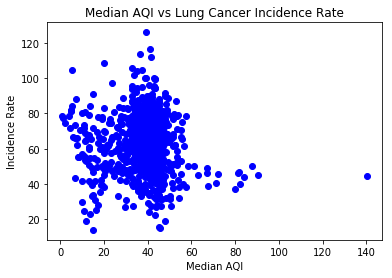

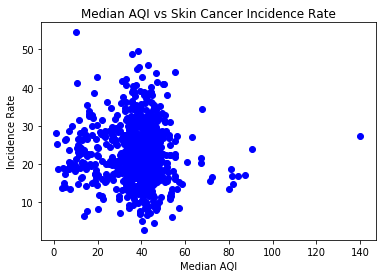

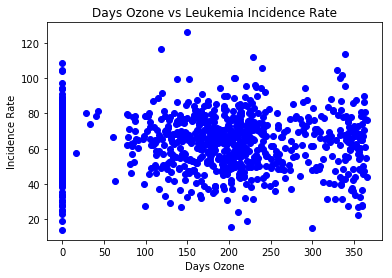

In [22]:
plt.plot(final_df["Median AQI"].astype("float"), final_df["Lung_IR"].astype("float"), "bo")
plt.title("Median AQI vs Lung Cancer Incidence Rate")
plt.xlabel("Median AQI")
plt.ylabel("Incidence Rate")
plt.show()

plt.plot(final_df["Median AQI"].astype("float"), final_df["Skin_IR"].astype("float"), "bo")
plt.title("Median AQI vs Skin Cancer Incidence Rate")
plt.xlabel("Median AQI")
plt.ylabel("Incidence Rate")
plt.show()

plt.plot(final_df["Days Ozone"].astype("float"), final_df["Lung_IR"].astype("float"), "bo")
plt.title("Days Ozone vs Leukemia Incidence Rate")
plt.xlabel("Days Ozone")
plt.ylabel("Incidence Rate")
plt.show()

In [23]:
# final_df["Skin_IR"].astype("float").plot.hist(bins=50)

In [24]:
# final_df_air['Unhealthy for Sensitive Groups Days'].plot.hist(bins=100)


In [25]:
# final_df[final_df.Blood_IR==''].head()




In [26]:
final_df[final_df.Blood_IR=='']=np.nan
final_df["Blood_IR"]= final_df["Blood_IR"].astype("float")
final_df["Skin_IR"]= final_df["Skin_IR"].astype("float")
final_df["Lung_IR"]= final_df["Lung_IR"].astype("float")

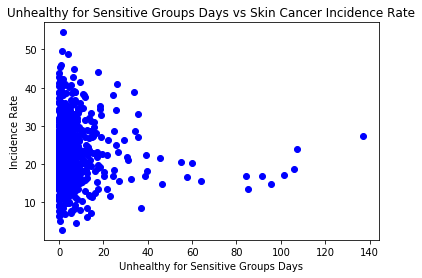

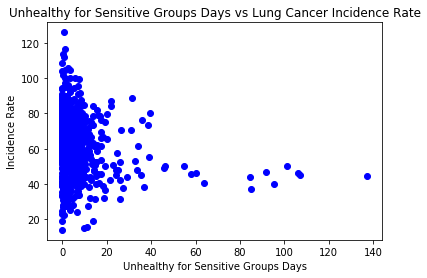

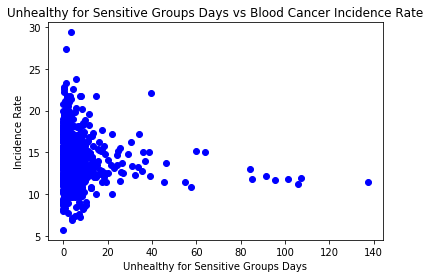

In [27]:
plt.plot(final_df["Unhealthy for Sensitive Groups Days"].astype("float"), final_df["Skin_IR"].astype("float"), "bo")
plt.title("Unhealthy for Sensitive Groups Days vs Skin Cancer Incidence Rate")
plt.xlabel("Unhealthy for Sensitive Groups Days")
plt.ylabel("Incidence Rate")
plt.show()

plt.plot(final_df["Unhealthy for Sensitive Groups Days"].astype("float"), final_df["Lung_IR"].astype("float"), "bo")
plt.title("Unhealthy for Sensitive Groups Days vs Lung Cancer Incidence Rate")
plt.xlabel("Unhealthy for Sensitive Groups Days")
plt.ylabel("Incidence Rate")
plt.show()

plt.plot(final_df["Unhealthy for Sensitive Groups Days"].astype("float"), final_df["Blood_IR"].astype("float"), "bo")
plt.title("Unhealthy for Sensitive Groups Days vs Blood Cancer Incidence Rate")
plt.xlabel("Unhealthy for Sensitive Groups Days")
plt.ylabel("Incidence Rate")
plt.show()



In [28]:
final_df.corr()

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Skin_IR,Lung_IR,Blood_IR
Days with AQI,1.000000,0.734776,0.530052,0.216553,0.084584,0.091609,0.053167,0.121340,0.285730,0.255841,0.060371,0.151902,0.331296,0.118998,0.336162,0.039520,-0.007448,-0.121054,-0.026966
Good Days,0.734776,1.000000,-0.158504,-0.300406,-0.218684,-0.158330,-0.030658,-0.001212,-0.330984,-0.315224,0.033113,0.079853,0.327028,0.180904,0.081079,0.106918,0.053899,0.009732,0.077670
Moderate Days,0.530052,-0.158504,1.000000,0.490464,0.172243,0.224114,0.082903,0.148196,0.729545,0.706472,0.051472,0.123593,0.056854,-0.125758,0.445961,-0.096089,-0.080297,-0.158842,-0.129362
Unhealthy for Sensitive Groups Days,0.216553,-0.300406,0.490464,1.000000,0.741848,0.449993,0.135592,0.161927,0.792500,0.608131,0.007802,0.057971,0.076001,0.147934,0.008053,-0.007107,-0.050470,-0.186755,-0.083977
Unhealthy Days,0.084584,-0.218684,0.172243,0.741848,1.000000,0.440903,0.080333,0.099648,0.524105,0.466775,-0.003740,0.005126,-0.031210,0.173153,0.007474,0.005584,-0.013838,-0.125875,-0.059583
Very Unhealthy Days,0.091609,-0.158330,0.224114,0.449993,0.440903,1.000000,0.383041,0.284756,0.393765,0.274997,-0.014910,0.008554,0.015640,0.001083,0.011765,0.094881,0.000912,-0.164551,-0.019525
Hazardous Days,0.053167,-0.030658,0.082903,0.135592,0.080333,0.383041,1.000000,0.811535,0.117640,0.052284,-0.008591,-0.009128,-0.032368,-0.017574,-0.043132,0.291139,0.007255,-0.116254,-0.042790
Max AQI,0.121340,-0.001212,0.148196,0.161927,0.099648,0.284756,0.811535,1.000000,0.196175,0.108234,-0.000237,0.004792,0.036592,-0.014969,-0.020584,0.189823,0.032097,-0.131247,-0.051016
90th Percentile AQI,0.285730,-0.330984,0.729545,0.792500,0.524105,0.393765,0.117640,0.196175,1.000000,0.864227,0.021163,0.057508,0.214623,-0.101116,0.119261,-0.174173,-0.041167,-0.155696,-0.099498
Median AQI,0.255841,-0.315224,0.706472,0.608131,0.466775,0.274997,0.052284,0.108234,0.864227,1.000000,0.028196,0.040786,0.377070,-0.309650,0.062488,-0.237977,-0.034449,-0.066664,-0.109281


C:\Users\stepc\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000021D6592F7B8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


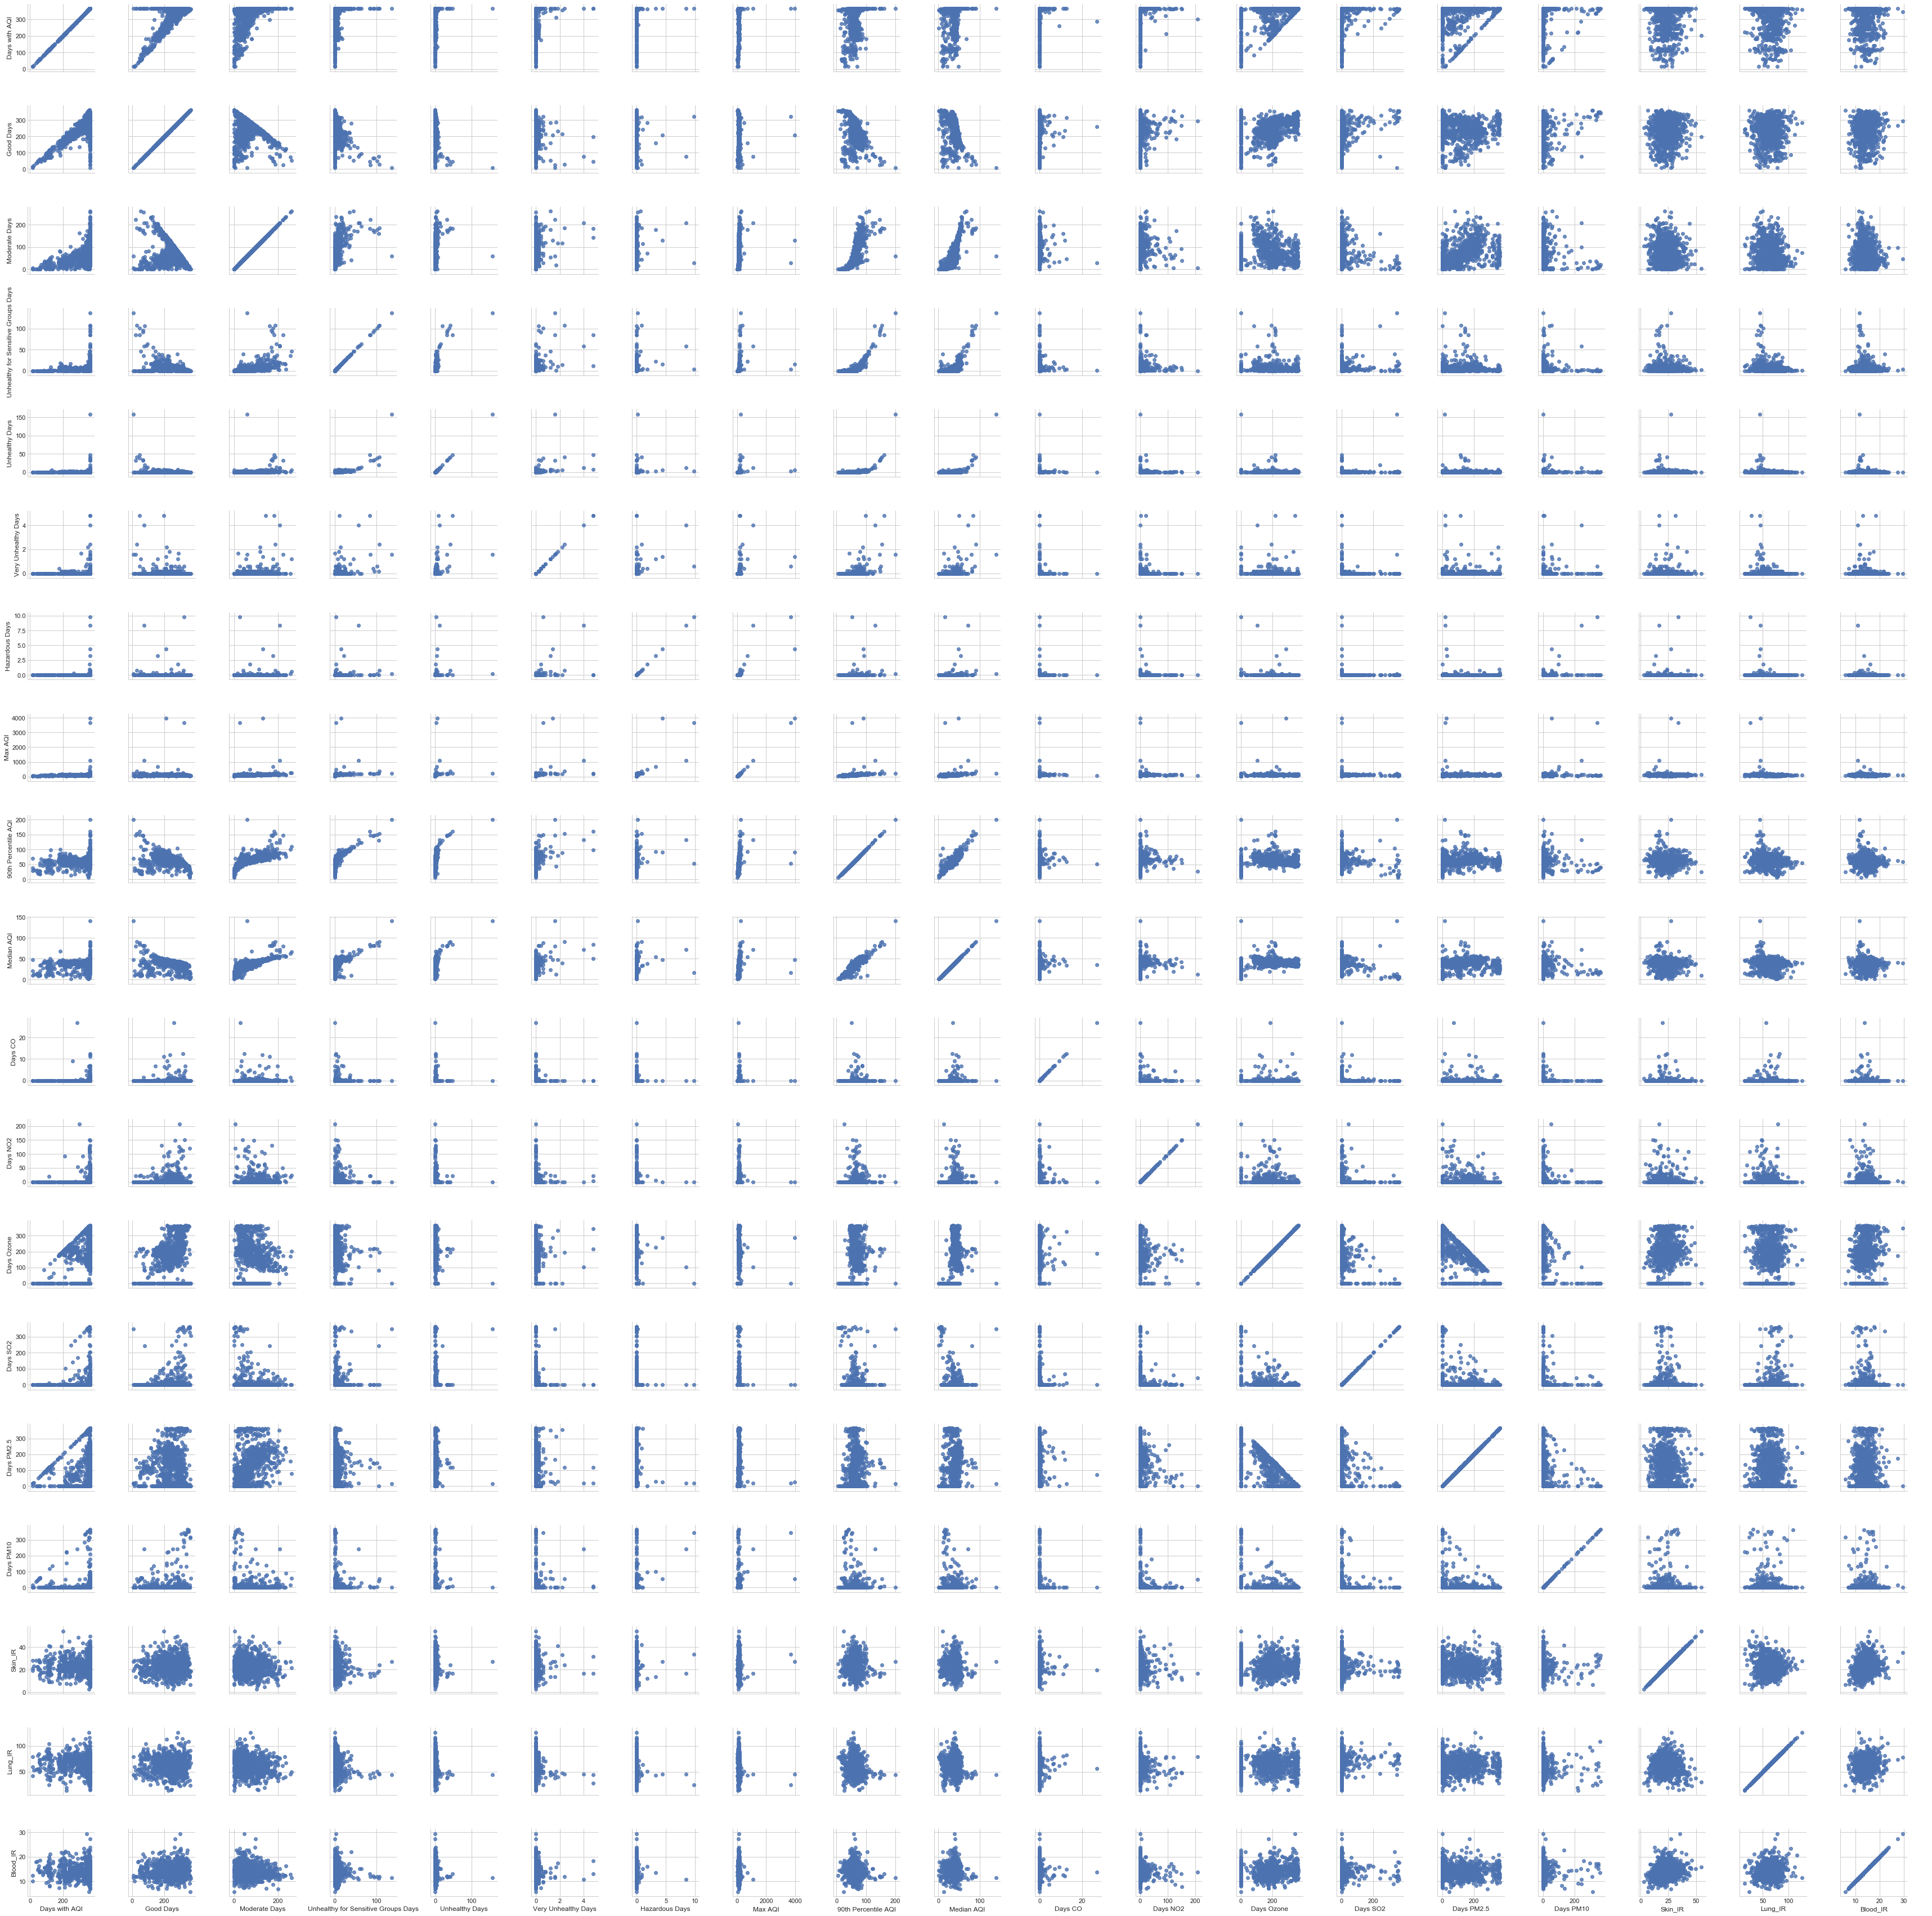

In [29]:
sns.set()
IPython_default = plt.rcParams.copy()
rcParams['figure.figsize'] = 10, 8
plt.rc('lines', linewidth=1)
plt.style.use('seaborn-whitegrid')
g = sns.PairGrid(final_df, palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();



In [30]:
df_stroke = pd.read_csv("Stroke Data Merge.csv", encoding = 'ISO-8859-1')
final_df = pd.merge(final_df, df_stroke, on='County')
final_df



,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Skin_IR,Lung_IR,Blood_IR,Stroke_IR
0,"Abbeville County, South Carolina",220.6,205.60,14.80,0.2,0.0,0.0,0.0,92.40,48.6,...,0.0,0.0,220.6,0.0,0.0,0.0,18.2,69.2,11.9,87.3
1,"Ada County, Idaho",365.2,285.00,72.00,6.4,1.6,0.2,0.0,166.20,65.0,...,4.8,47.0,223.6,0.2,47.0,42.6,33.0,52.3,16.0,66.8
2,"Adams County, Colorado",365.0,231.60,124.60,8.4,0.4,0.0,0.0,138.40,75.6,...,0.0,108.8,204.8,1.0,21.8,28.6,15.3,52.9,12.0,67.3
3,"Adams County, Illinois",291.8,265.20,25.60,0.8,0.2,0.0,0.0,106.20,50.2,...,0.0,0.0,291.8,0.0,0.0,0.0,31.9,73.1,11.1,58.9
4,"Adams County, Mississippi",174.0,139.00,34.00,1.0,0.0,0.0,0.0,101.00,67.0,...,0.0,0.0,174.0,0.0,0.0,0.0,13.0,65.5,12.5,88.7
5,"Adams County, Ohio",363.8,316.20,47.20,0.4,0.0,0.0,0.0,80.20,52.2,...,0.0,0.0,0.0,18.0,345.8,0.0,24.9,83.3,9.8,82.7
6,"Adams County, Pennsylvania",364.2,231.80,128.00,4.4,0.0,0.0,0.0,121.80,69.8,...,1.0,3.0,202.6,0.0,157.6,0.0,30.2,63.7,17.0,75.2
7,"Aiken County, South Carolina",232.8,208.60,24.00,0.2,0.0,0.0,0.0,86.40,54.0,...,0.0,0.0,232.8,0.0,0.0,0.0,14.0,55.8,13.0,79.5
8,"Alachua County, Florida",360.8,310.00,49.80,0.6,0.4,0.0,0.0,103.40,52.6,...,0.0,0.0,220.4,0.0,140.4,0.0,28.1,60.7,11.1,75.0
9,"Alamance County, North Carolina",320.0,259.20,60.40,0.4,0.0,0.0,0.0,82.00,54.4,...,0.0,0.0,0.0,0.0,320.0,0.0,36.4,70.1,14.4,81.5


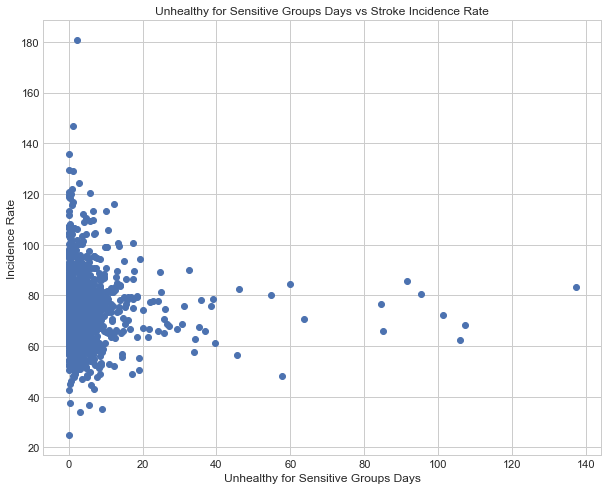

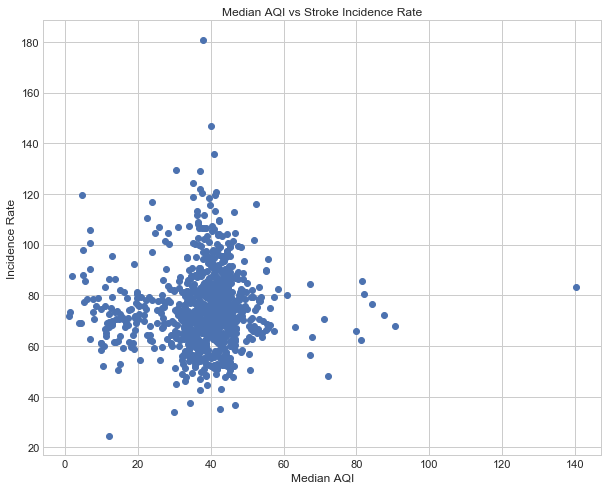

In [31]:

plt.plot(final_df["Unhealthy for Sensitive Groups Days"].astype("float"), final_df["Stroke_IR"].astype("float"), "bo")
plt.title("Unhealthy for Sensitive Groups Days vs Stroke Incidence Rate")
plt.xlabel("Unhealthy for Sensitive Groups Days")
plt.ylabel("Incidence Rate")
plt.show()

plt.plot(final_df["Median AQI"].astype("float"), final_df["Stroke_IR"].astype("float"), "bo")
plt.title("Median AQI vs Stroke Incidence Rate")
plt.xlabel("Median AQI")
plt.ylabel("Incidence Rate")
plt.show()




In [32]:
# With 923 rows, the degree of freedom is 923-1 = 922
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 922)

# The critical value
critical_value


993.7516311563091

In [35]:
# Run the chi square test with stats.chisquare()
stats.chisquare(final_df['Unhealthy for Sensitive Groups Days'], final_df['Stroke_IR'])



Power_divergenceResult(statistic=60718.004751115725, pvalue=0.0)

?????

p value is 0.0.   

The chi-square value of 60718 at a confidence level of 95% exceeds the critical value of 993.  

Can we conclude that the relationship between "Unhealthy for Sensitive Groups Days" and "Stroke Incidence" is statistically significant?  

- seems like nonsense to me!  


From somewhere on Google:
    Chi-squared tests are often constructed from a sum of squared errors, or through the sample variance. Test statistics that follow a chi-squared distribution arise from an assumption of independent normally distributed data, which is valid in many cases due to the central limit theorem. A chi-squared test can be used to attempt rejection of the null hypothesis that the data are independent.

Can we assume normality?  



